# Cancer Risk Prediction

Follow exercise 2 from **“Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow” by Aurélien Géron. Copyright 2023 Aurélien Géron, 978-1-098-12597-4**, but with a differernt data set of choice. I used "cancer-risk-factors" from Kaggle.com (https://www.kaggle.com/datasets/tarekmasryo/cancer-risk-factors-dataset/data).

In [1]:
import pandas as pd
import numpy as np
import sklearn
import sys, os
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
# default sizes for plotting

plt.rc('font', size=13)
plt.rc('axes', labelsize=13, titlesize=13)
plt.rc('legend', fontsize=13)
plt.rc('xtick', labelsize=11)
plt.rc('ytick', labelsize=11)


## get the data 

Load and have a look at the daata

### load the data

In [3]:
file_path = './cancer-risk-factors.csv'

# Load the dataset using a try-except block to handle potential file errors
try:
    cancer_risk_factors = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"ERROR: No such file: {file_path}")

### take a look at the data strcture

In [4]:
cancer_risk_factors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               2000 non-null   object 
 1   Cancer_Type              2000 non-null   object 
 2   Age                      2000 non-null   int64  
 3   Gender                   2000 non-null   int64  
 4   Smoking                  2000 non-null   int64  
 5   Alcohol_Use              2000 non-null   int64  
 6   Obesity                  2000 non-null   int64  
 7   Family_History           2000 non-null   int64  
 8   Diet_Red_Meat            2000 non-null   int64  
 9   Diet_Salted_Processed    2000 non-null   int64  
 10  Fruit_Veg_Intake         2000 non-null   int64  
 11  Physical_Activity        2000 non-null   int64  
 12  Air_Pollution            2000 non-null   int64  
 13  Occupational_Hazards     2000 non-null   int64  
 14  BRCA_Mutation           

In [5]:
cancer_risk_factors.head()

,Patient_ID,Cancer_Type,Age,Gender,Smoking,Alcohol_Use,Obesity,Family_History,Diet_Red_Meat,Diet_Salted_Processed,...,Physical_Activity,Air_Pollution,Occupational_Hazards,BRCA_Mutation,H_Pylori_Infection,Calcium_Intake,Overall_Risk_Score,BMI,Physical_Activity_Level,Risk_Level
0,LU0000,Breast,68,0,7,2,8,0,5,3,...,4,6,3,1,0,0,0.398696,28.0,5,Medium
1,LU0001,Prostate,74,1,8,9,8,0,0,3,...,1,3,3,0,0,5,0.424299,25.4,9,Medium
2,LU0002,Skin,55,1,7,10,7,0,3,3,...,1,8,10,0,0,6,0.605082,28.6,2,Medium
3,LU0003,Colon,61,0,6,2,2,0,6,2,...,6,4,8,0,0,8,0.318449,32.1,7,Low
4,LU0004,Lung,67,1,10,7,4,0,6,3,...,9,10,9,0,0,5,0.524358,25.1,2,Medium


In [6]:
# check categories in non-numerical features
cancer_risk_factors['Patient_ID'].value_counts()

Patient_ID
LU0000    1
PR0129    1
PR0142    1
PR0141    1
PR0140    1
         ..
BR0261    1
BR0260    1
BR0259    1
BR0258    1
ST0399    1
Name: count, Length: 2000, dtype: int64

In [7]:
cancer_risk_factors['Cancer_Type'].value_counts()

Cancer_Type
Lung        527
Breast      460
Colon       418
Prostate    305
Skin        290
Name: count, dtype: int64

In [8]:
cancer_risk_factors['Risk_Level'].value_counts()

Risk_Level
Medium    1574
Low        324
High       102
Name: count, dtype: int64

In [9]:
cancer_risk_factors.describe()

,Age,Gender,Smoking,Alcohol_Use,Obesity,Family_History,Diet_Red_Meat,Diet_Salted_Processed,Fruit_Veg_Intake,Physical_Activity,Air_Pollution,Occupational_Hazards,BRCA_Mutation,H_Pylori_Infection,Calcium_Intake,Overall_Risk_Score,BMI,Physical_Activity_Level
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.00000,2000.000000,2000.000000,2000.000000
mean,63.248000,0.489000,5.157000,5.035000,5.967500,0.194500,5.189500,4.563500,4.927500,4.015000,5.323000,4.979000,0.032500,0.19650,3.94050,0.454449,26.183350,4.938500
std,10.462946,0.500004,3.325339,3.260996,3.061393,0.395914,3.154452,3.088323,3.045305,2.978458,3.207462,3.212899,0.177368,0.39745,3.04887,0.123074,3.947459,3.166027
min,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.029285,15.000000,0.000000
25%,56.000000,0.000000,2.000000,2.000000,4.000000,0.000000,3.000000,2.000000,3.000000,1.000000,3.000000,2.000000,0.000000,0.00000,1.00000,0.366982,23.500000,2.000000
50%,64.000000,0.000000,5.000000,5.000000,6.000000,0.000000,5.000000,4.000000,5.000000,4.000000,5.000000,5.000000,0.000000,0.00000,4.00000,0.455399,26.200000,5.000000
75%,70.000000,1.000000,8.000000,8.000000,9.000000,0.000000,8.000000,7.000000,8.000000,6.000000,8.000000,8.000000,0.000000,0.00000,6.00000,0.539782,28.700000,8.000000
max,90.000000,1.000000,10.000000,10.000000,10.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.00000,10.00000,0.852158,41.400000,10.000000


#### visualize the data - plot as histograms

In [10]:
# handy function to save plots inspired by homl3 exercise 2 

In [11]:
img_path = './'

In [12]:
if not os.path.exists(img_path):
    ! mkdir $img_path

In [13]:
def save_figs(name, fig_extension='png', resolution=200, img_path=img_path):
    path = img_path + f'{name}.{fig_extension}'
    plt.savefig(path, format=fig_extension, dpi=resolution)

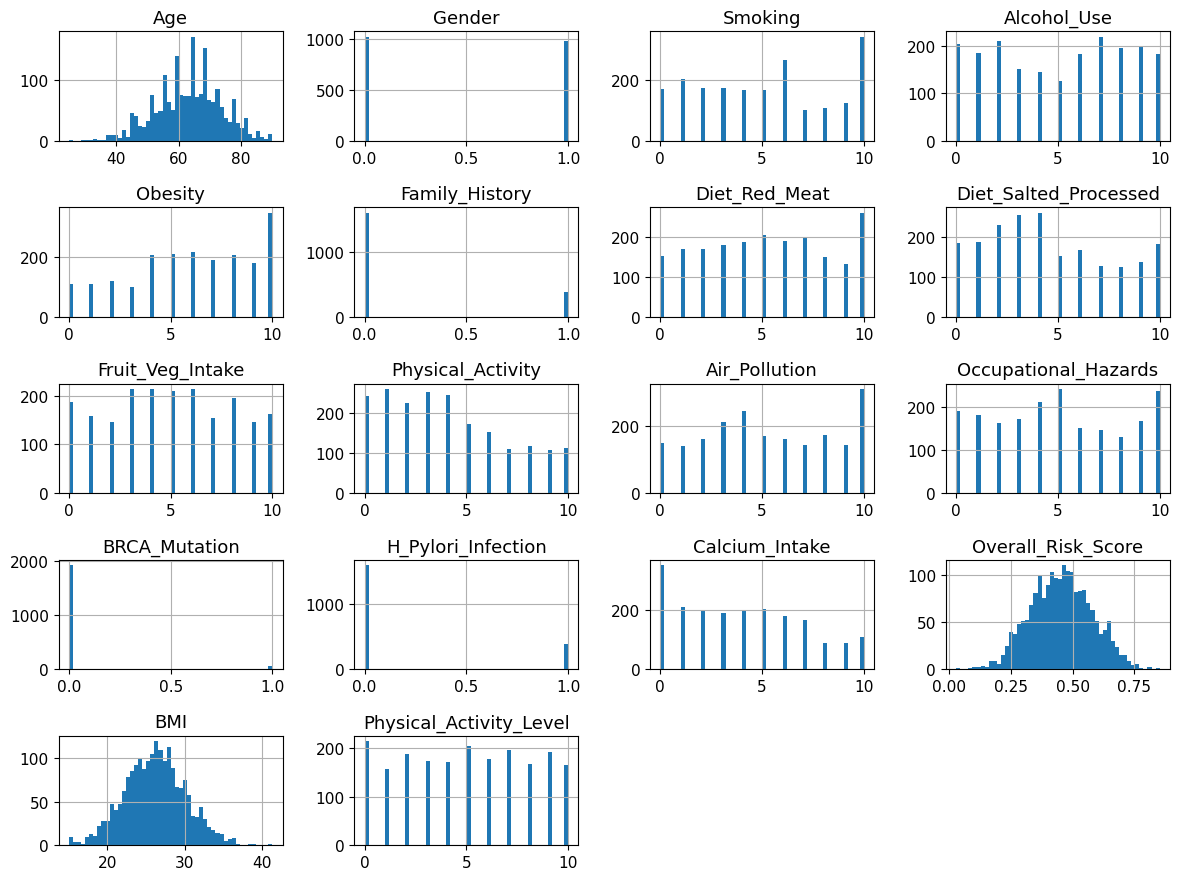

In [14]:
cancer_risk_factors.hist(bins=50, figsize=(12, 9)) # only plots numerical attributes
plt.tight_layout()
save_figs("attribute_histogram_plots")
plt.show()

### create a test set

In [15]:
# random seed to ensure results stay the same 
np.random.seed(42)

Data set large enough relative to number pf features to rely on random sampling methods for splitting data?
First try random sampling

In [16]:

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(cancer_risk_factors, test_size=0.2, random_state=42)

In [17]:
train_set['Obesity'].describe()

count    1600.000000
mean        5.987500
std         3.080913
min         0.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        10.000000
Name: Obesity, dtype: float64

In [18]:
cancer_risk_factors['Obesity'].describe()

count    2000.000000
mean        5.967500
std         3.061393
min         0.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        10.000000
Name: Obesity, dtype: float64

In [19]:
(train_set['Gender'] == 1).sum()

776

In [20]:
(cancer_risk_factors['Gender'] == 1).sum()


978

In [21]:
(train_set['Smoking'] == 1).sum()

155

In [22]:
(cancer_risk_factors['Smoking'] == 1).sum()


204

In [23]:
(train_set['BRCA_Mutation'] == 1).sum()

49

In [24]:
(cancer_risk_factors['BRCA_Mutation'] == 1).sum()


65

In [25]:
train_set['Air_Pollution'].describe()

count    1600.000000
mean        5.343750
std         3.226584
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Air_Pollution, dtype: float64

In [26]:
cancer_risk_factors['Air_Pollution'].describe()

count    2000.000000
mean        5.323000
std         3.207462
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Air_Pollution, dtype: float64

<Axes: >

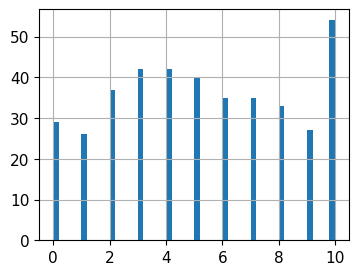

In [27]:
test_set['Air_Pollution'].hist(bins=50, figsize=(4, 3))

<Axes: >

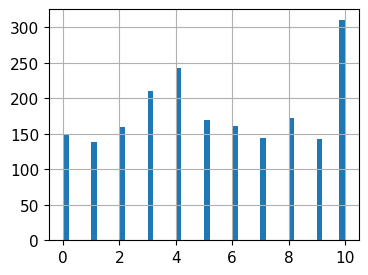

In [28]:
cancer_risk_factors['Air_Pollution'].hist(bins=50, figsize=(4, 3))

Try stratified method for comparison - with air pollution, this seems to be somewhat correlated

In [29]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(cancer_risk_factors, cancer_risk_factors['Air_Pollution']):
    strat_train_set_n = cancer_risk_factors.iloc[train_index]
    strat_test_set_n = cancer_risk_factors.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [30]:
train_set_strat, test_set_strat = strat_splits[0]

In [31]:
train_set_strat['Air_Pollution'].describe()

count    1600.000000
mean        5.323750
std         3.206105
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Air_Pollution, dtype: float64

<Axes: >

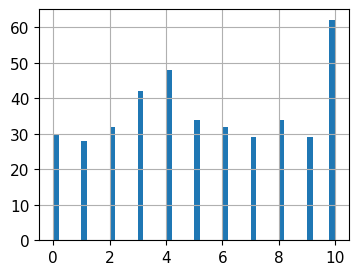

In [32]:
test_set_strat['Air_Pollution'].hist(bins=50, figsize=(4, 3))

## Explore and visualize the data more exentensivly to gain insights

In [33]:
cancer_risk_factors = train_set_strat.copy()

In [34]:
cancer_risk_factors

,Patient_ID,Cancer_Type,Age,Gender,Smoking,Alcohol_Use,Obesity,Family_History,Diet_Red_Meat,Diet_Salted_Processed,...,Physical_Activity,Air_Pollution,Occupational_Hazards,BRCA_Mutation,H_Pylori_Infection,Calcium_Intake,Overall_Risk_Score,BMI,Physical_Activity_Level,Risk_Level
444,BR0044,Skin,50,0,0,7,4,0,2,5,...,1,4,7,0,0,6,0.348580,20.8,4,Medium
646,BR0246,Colon,57,0,0,5,4,0,6,2,...,2,4,3,0,0,2,0.260191,15.2,6,Low
1790,ST0190,Lung,55,1,7,2,4,0,4,9,...,3,4,0,0,1,10,0.285163,18.5,10,Low
1043,CO0243,Colon,60,1,1,6,9,0,5,10,...,5,5,10,0,0,9,0.647086,25.8,4,Medium
1417,PR0217,Lung,72,1,7,2,8,0,3,2,...,3,5,8,0,0,7,0.425804,27.1,10,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1659,ST0059,Breast,55,0,6,1,10,0,0,7,...,2,2,5,0,1,3,0.485057,30.6,1,Medium
1059,CO0259,Colon,66,0,6,4,5,1,10,10,...,4,3,5,0,0,3,0.551552,24.5,1,Medium
162,LU0162,Colon,71,1,9,0,5,0,7,2,...,10,7,0,0,0,2,0.365623,30.6,7,Medium
1627,ST0027,Colon,69,1,5,7,10,0,10,7,...,9,8,3,0,1,1,0.709422,31.1,9,High


### looking for correlations

In [35]:
corr_matrix = cancer_risk_factors.corr(numeric_only=True)

In [36]:
corr_matrix

,Age,Gender,Smoking,Alcohol_Use,Obesity,Family_History,Diet_Red_Meat,Diet_Salted_Processed,Fruit_Veg_Intake,Physical_Activity,Air_Pollution,Occupational_Hazards,BRCA_Mutation,H_Pylori_Infection,Calcium_Intake,Overall_Risk_Score,BMI,Physical_Activity_Level
Age,1.000000,0.261532,0.039111,-0.037646,-0.011268,0.047580,-0.021794,-0.053078,0.001623,0.065389,0.004875,0.044980,-0.025481,0.022463,0.056922,-0.017242,-0.009343,-0.046683
Gender,0.261532,1.000000,0.131595,-0.059832,-0.185989,0.025279,0.047978,0.022824,0.015527,0.050569,0.059337,0.068397,-0.087357,-0.010482,0.306879,0.028158,0.018057,-0.046340
Smoking,0.039111,0.131595,1.000000,0.119203,-0.094586,-0.019468,-0.140282,-0.044709,0.038724,0.101957,0.468018,-0.014494,-0.046065,-0.049610,0.095984,0.435382,-0.009550,0.032359
Alcohol_Use,-0.037646,-0.059832,0.119203,1.000000,0.000005,-0.009383,-0.023592,-0.018815,0.051976,0.027991,0.075645,-0.009821,-0.056017,-0.064060,-0.049962,0.392609,-0.026751,0.031946
Obesity,-0.011268,-0.185989,-0.094586,0.000005,1.000000,0.014936,-0.043085,-0.018268,-0.002164,0.002289,-0.063800,-0.002530,0.049428,0.042303,-0.111642,0.232921,0.023334,0.016222
Family_History,0.047580,0.025279,-0.019468,-0.009383,0.014936,1.000000,0.014082,-0.021999,0.000157,0.000090,-0.020183,0.037806,0.014842,-0.024447,0.049063,0.040292,0.020397,0.077760
Diet_Red_Meat,-0.021794,0.047978,-0.140282,-0.023592,-0.043085,0.014082,1.000000,0.176626,-0.187754,-0.004522,-0.070402,-0.006954,-0.023282,0.029622,0.087774,0.278684,0.039664,0.018642
Diet_Salted_Processed,-0.053078,0.022824,-0.044709,-0.018815,-0.018268,-0.021999,0.176626,1.000000,-0.222027,-0.013110,0.048024,0.063313,0.038395,0.125449,0.061613,0.380086,-0.014938,0.007715
Fruit_Veg_Intake,0.001623,0.015527,0.038724,0.051976,-0.002164,0.000157,-0.187754,-0.222027,1.000000,0.000652,-0.049422,-0.056929,-0.050997,-0.156422,-0.025375,-0.151826,-0.003334,-0.007981
Physical_Activity,0.065389,0.050569,0.101957,0.027991,0.002289,0.000090,-0.004522,-0.013110,0.000652,1.000000,0.087697,0.032854,-0.001109,-0.020689,0.001138,0.068141,0.003495,0.050067


In [37]:
corr_matrix['Overall_Risk_Score'].sort_values(ascending=False)

Overall_Risk_Score         1.000000
Air_Pollution              0.509763
Smoking                    0.435382
Alcohol_Use                0.392609
Diet_Salted_Processed      0.380086
Occupational_Hazards       0.356244
Diet_Red_Meat              0.278684
Obesity                    0.232921
Calcium_Intake             0.074137
Physical_Activity          0.068141
Physical_Activity_Level    0.050586
H_Pylori_Infection         0.046006
Family_History             0.040292
BMI                        0.028846
Gender                     0.028158
BRCA_Mutation             -0.003202
Age                       -0.017242
Fruit_Veg_Intake          -0.151826
Name: Overall_Risk_Score, dtype: float64

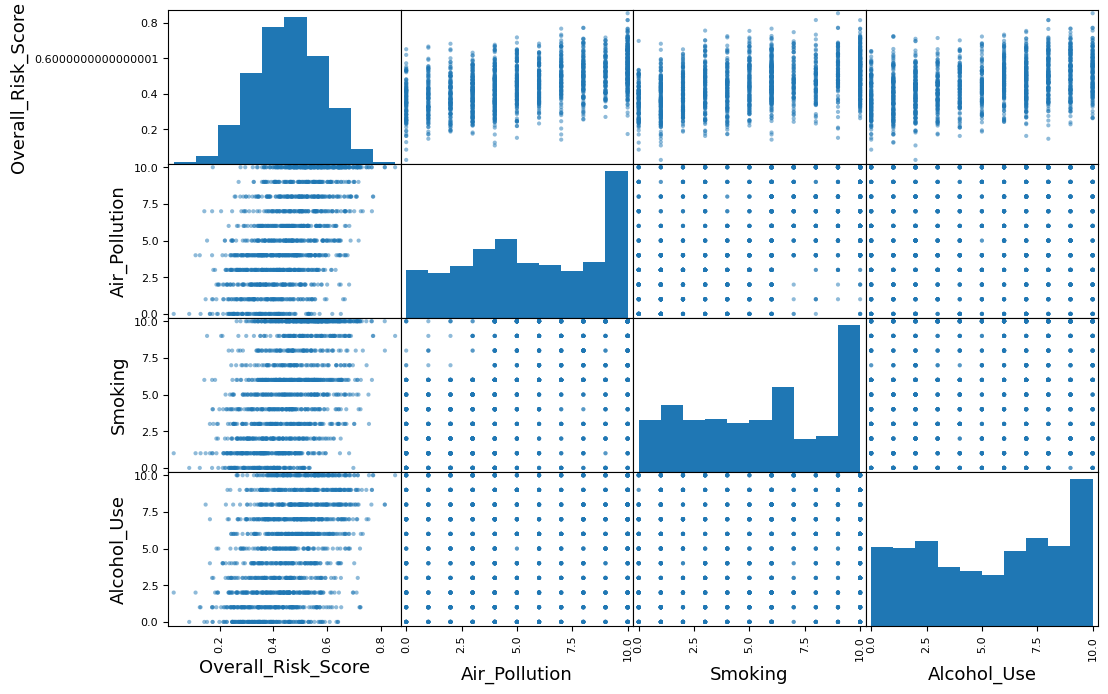

In [38]:
from pandas.plotting import scatter_matrix

attributes = ['Overall_Risk_Score', 'Air_Pollution', 'Smoking', 'Alcohol_Use']
           #   'Occupational_Hazards', 'Diet_Salted_Processed', 'Diet_Red_Meat', 'Obesity']
scatter_matrix(cancer_risk_factors[attributes], figsize= (12, 8))
save_figs('scatter_matrix_plots_corr')


In [39]:
# attributes are not well suited to be displayed as scatter plots

## Experimenting with Attribute Combinations

The following score is made up and more or less subjective based on impressions and experiences from my studies

In [40]:
# goes from low (min  = 0, balanced)  to high (max = 1, less balanced)
cancer_risk_factors['balanced_lifesyle_score'] = (( cancer_risk_factors['Smoking'] + cancer_risk_factors['Alcohol_Use'] 
                                                    + cancer_risk_factors['Diet_Salted_Processed'] + cancer_risk_factors['Obesity'] + cancer_risk_factors['Diet_Red_Meat']))
                                                    #   cancer_risk_factors['Physical_Activity'] + cancer_risk_factors['Physical_Activity_Level'] + cancer_risk_factors['Fruit_Veg_Intake']))
# att =  ['Smoking', 'Alcohol_Use', 'Diet_Salted_Processed', 'Obesity','Diet_Red_Meat']
att =  ['Physical_Activity', 'Physical_Activity_Level', 'Fruit_Veg_Intake']
for a in att:
    cancer_risk_factors['balanced_lifesyle_score'] += (10 - cancer_risk_factors[a])

cancer_risk_factors['balanced_lifesyle_score'] = cancer_risk_factors['balanced_lifesyle_score']  / 80

In [41]:
cancer_risk_factors['balanced_lifesyle_score'].describe()

count    1600.000000
mean        0.527250
std         0.111219
min         0.187500
25%         0.450000
50%         0.525000
75%         0.603125
max         0.862500
Name: balanced_lifesyle_score, dtype: float64

In [42]:
corr_matrix = cancer_risk_factors.corr(numeric_only=True)

In [43]:
corr_matrix

,Age,Gender,Smoking,Alcohol_Use,Obesity,Family_History,Diet_Red_Meat,Diet_Salted_Processed,Fruit_Veg_Intake,Physical_Activity,Air_Pollution,Occupational_Hazards,BRCA_Mutation,H_Pylori_Infection,Calcium_Intake,Overall_Risk_Score,BMI,Physical_Activity_Level,balanced_lifesyle_score
Age,1.000000,0.261532,0.039111,-0.037646,-0.011268,0.047580,-0.021794,-0.053078,0.001623,0.065389,0.004875,0.044980,-0.025481,0.022463,0.056922,-0.017242,-0.009343,-0.046683,-0.034877
Gender,0.261532,1.000000,0.131595,-0.059832,-0.185989,0.025279,0.047978,0.022824,0.015527,0.050569,0.059337,0.068397,-0.087357,-0.010482,0.306879,0.028158,0.018057,-0.046340,-0.017425
Smoking,0.039111,0.131595,1.000000,0.119203,-0.094586,-0.019468,-0.140282,-0.044709,0.038724,0.101957,0.468018,-0.014494,-0.046065,-0.049610,0.095984,0.435382,-0.009550,0.032359,0.261654
Alcohol_Use,-0.037646,-0.059832,0.119203,1.000000,0.000005,-0.009383,-0.023592,-0.018815,0.051976,0.027991,0.075645,-0.009821,-0.056017,-0.064060,-0.049962,0.392609,-0.026751,0.031946,0.357055
Obesity,-0.011268,-0.185989,-0.094586,0.000005,1.000000,0.014936,-0.043085,-0.018268,-0.002164,0.002289,-0.063800,-0.002530,0.049428,0.042303,-0.111642,0.232921,0.023334,0.016222,0.281489
Family_History,0.047580,0.025279,-0.019468,-0.009383,0.014936,1.000000,0.014082,-0.021999,0.000157,0.000090,-0.020183,0.037806,0.014842,-0.024447,0.049063,0.040292,0.020397,0.077760,-0.035991
Diet_Red_Meat,-0.021794,0.047978,-0.140282,-0.023592,-0.043085,0.014082,1.000000,0.176626,-0.187754,-0.004522,-0.070402,-0.006954,-0.023282,0.029622,0.087774,0.278684,0.039664,0.018642,0.398503
Diet_Salted_Processed,-0.053078,0.022824,-0.044709,-0.018815,-0.018268,-0.021999,0.176626,1.000000,-0.222027,-0.013110,0.048024,0.063313,0.038395,0.125449,0.061613,0.380086,-0.014938,0.007715,0.456423
Fruit_Veg_Intake,0.001623,0.015527,0.038724,0.051976,-0.002164,0.000157,-0.187754,-0.222027,1.000000,0.000652,-0.049422,-0.056929,-0.050997,-0.156422,-0.025375,-0.151826,-0.003334,-0.007981,-0.449873
Physical_Activity,0.065389,0.050569,0.101957,0.027991,0.002289,0.000090,-0.004522,-0.013110,0.000652,1.000000,0.087697,0.032854,-0.001109,-0.020689,0.001138,0.068141,0.003495,0.050067,-0.309198


In [44]:
corr_matrix['Overall_Risk_Score'].sort_values(ascending=False)

Overall_Risk_Score         1.000000
balanced_lifesyle_score    0.628367
Air_Pollution              0.509763
Smoking                    0.435382
Alcohol_Use                0.392609
Diet_Salted_Processed      0.380086
Occupational_Hazards       0.356244
Diet_Red_Meat              0.278684
Obesity                    0.232921
Calcium_Intake             0.074137
Physical_Activity          0.068141
Physical_Activity_Level    0.050586
H_Pylori_Infection         0.046006
Family_History             0.040292
BMI                        0.028846
Gender                     0.028158
BRCA_Mutation             -0.003202
Age                       -0.017242
Fruit_Veg_Intake          -0.151826
Name: Overall_Risk_Score, dtype: float64

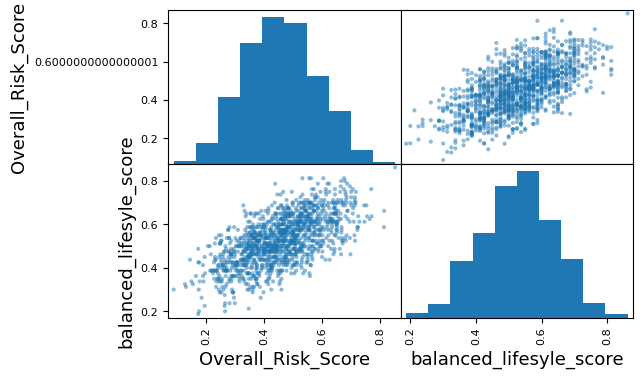

In [121]:
attributes = ['Overall_Risk_Score', 'balanced_lifesyle_score']
scatter_matrix(cancer_risk_factors[attributes], figsize= (6, 4))
save_figs('scatter_matrix_plots_corr2')

This combined attribute illustrates the potential importance of the included features in relation to cancer risk. However, I won’t include this observation in the primary feature preprocessing, since it might be more interesting to examine the importance of the individual attributes. Maybe later, I’ll revisit this as an exercise.

## prepare data for ml algorithm - preprocess

### + data cleaning

Original training set without the label

target is risk level, overall risk score and cancer type are also related so they are excluded as well. drop 'Patient_ID', as  patient ID does not hold any useful info in this context

In [60]:
cancer_risk_factors = train_set_strat.drop(['Risk_Level', 'Overall_Risk_Score', 'Cancer_Type', 'Patient_ID',], axis=1)
cancer_risk_factors_labels = train_set_strat['Overall_Risk_Score'].copy()

In [61]:
cancer_risk_factors.columns


Index(['Age', 'Gender', 'Smoking', 'Alcohol_Use', 'Obesity', 'Family_History',
       'Diet_Red_Meat', 'Diet_Salted_Processed', 'Fruit_Veg_Intake',
       'Physical_Activity', 'Air_Pollution', 'Occupational_Hazards',
       'BRCA_Mutation', 'H_Pylori_Infection', 'Calcium_Intake', 'BMI',
       'Physical_Activity_Level'],
      dtype='object')

In [62]:
cancer_risk_factors.isna().any().sum()

0

In [63]:
cancer_risk_factors.isnull().any().sum()

0

No attributes with NaN or missing vcalues

skip outlier search

## Handling text and categorical attributes

In [64]:
from sklearn.preprocessing import OneHotEncoder

In [65]:
cancer_risk_factors.select_dtypes(exclude=np.number).columns

Index([], dtype='object')

 would chose the one hot  encoder, but i excluded all categorical data and chose the numerical attribute as label

### Feature scaling

In [66]:
# val - min / std
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
cancer_std_scaled = std_scaler.fit_transform(cancer_risk_factors)

In [70]:
cancer_risk_factors.columns.get_loc('BRCA_Mutation')

12

(array([1555.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          45.]),
 array([-0.17011439,  0.43473678,  1.03958796,  1.64443913,  2.24929031,
         2.85414148,  3.45899266,  4.06384384,  4.66869501,  5.27354619,
         5.87839736]),
 <BarContainer object of 10 artists>)

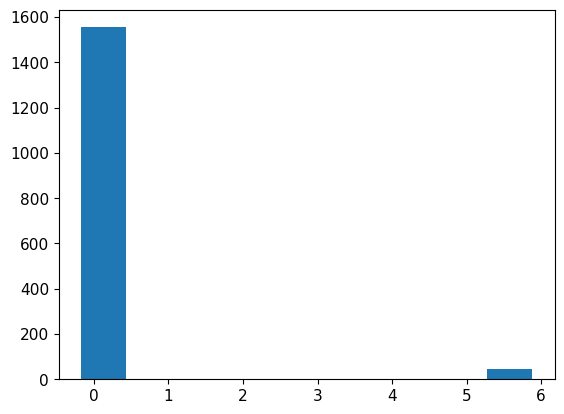

In [75]:
plt.hist(cancer_std_scaled[:,12])

### Transformation pipeline

For now I will only use standard scaling to preprocess, later I will test combining some attributes to balanced lifestlye score.

In [77]:
from sklearn.compose import ColumnTransformer

In [86]:
features = cancer_risk_factors.columns.tolist()
prepoc = ColumnTransformer(transformers=[('preproceesing_all', StandardScaler(), features)], remainder='passthrough')

In [87]:
cancer_risk_prepared = prepoc.fit_transform(cancer_risk_factors)

In [88]:
cancer_risk_prepared.shape

(1600, 17)

## Select and train a model

### training and evaluating on the training set

In [89]:
from sklearn.pipeline import make_pipeline

In [90]:
# lets first try a simple linear regression model
from sklearn.linear_model import LinearRegression
lin_reg = make_pipeline(prepoc, LinearRegression())
lin_reg.fit(cancer_risk_factors, cancer_risk_factors_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('preproceesing_all',
                                                  StandardScaler(),
                                                  ['Age', 'Gender', 'Smoking',
                                                   'Alcohol_Use', 'Obesity',
                                                   'Family_History',
                                                   'Diet_Red_Meat',
                                                   'Diet_Salted_Processed',
                                                   'Fruit_Veg_Intake',
                                                   'Physical_Activity',
                                                   'Air_Pollution',
                                                   'Occupational_Hazards',
                                                   'BRCA_Mutation',
                                                   'H_Pylori_Infection',
                                                   'Calcium_Intake', 'BMI',
                                                   'Physical_Activity_Level'])])),
                ('linearregression', LinearRegression())])

try pipeine on training instances

In [94]:
pred = lin_reg.predict(cancer_risk_factors)
pred[:5].round(2)

array([0.36, 0.29, 0.37, 0.58, 0.43])

In [97]:
pred[:5]

array([0.3613196 , 0.29205558, 0.36992365, 0.57675886, 0.43224562])

In [95]:
cancer_risk_factors_labels[:5].round(2)

444     0.35
646     0.26
1790    0.29
1043    0.65
1417    0.43
Name: Overall_Risk_Score, dtype: float64

In [98]:
error_ratios = pred[:5] / cancer_risk_factors_labels.iloc[:5].values - 1

In [100]:
error_ratios * 100

array([  3.65458353,  12.24640904,  29.72353539, -10.86826052,
         1.51275385])

In [103]:
from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(cancer_risk_factors_labels, pred, squared=False)
lin_rmse

0.04957679048398814

### cross_validation for better evaluation

In [109]:
from sklearn.model_selection import cross_val_score

scores = -cross_val_score(lin_reg, cancer_risk_factors, cancer_risk_factors_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

In [110]:
pd.Series(scores).describe()

count    10.000000
mean      0.050141
std       0.002701
min       0.045559
25%       0.048395
50%       0.049432
75%       0.052444
max       0.054362
dtype: float64

this looks pretty good but i am  going to test other models later